Authors: Gabriella Sussman, Anisha Joshi

#**Initial Setup**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Install SPARK**

In [ ]:
# Change directory
%cd /content/drive/My Drive/IDS561_Project

/content/drive/My Drive/IDS561_Project


In [ ]:
# Download Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Get Spark installer (check the path on spark.apache.org)
#!wget -v https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
# Untar the Spark installer
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [ ]:
# Install findspark - a python library to find Spark
!pip install -q findspark

In [ ]:
# Set environment variables - set Java and Spark home based on the location where they are stored
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/My Drive/IDS561_Project/spark-3.1.2-bin-hadoop3.2"

# Create a local Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SQLContext
sql = SQLContext(sc)

##**Import Libraries**

In [ ]:
import csv # Read CSVs 
import pandas as pd 
pd.options.mode.chained_assignment = None
import pyspark

# Libraries for pyspark SQL
from pyspark.sql.types import StringType, IntegerType, DoubleType, DecimalType
from pyspark.sql.functions import *

# Libraries for Machine Learning
import numpy as np
import gc
from pyspark.ml.stat import Correlation

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import lightgbm as lgb

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

# Other libraries
import random
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

##**Import Datasets**

### Read CSV files and convert to Spark DF

In [ ]:
# Read CSV files and convert to Spark DF
raw_zillow_df = spark.read.options(inferSchema='True',delimiter=',').csv("/content/drive/My Drive/IDS561_Project/properties_2016.csv", header=True)

# Remove rows where taxvaluedollarcnt is null, since this is going to be our dependent variable
zillow_df = raw_zillow_df.filter(raw_zillow_df.taxvaluedollarcnt.isNotNull())

In [ ]:
zillow_df.show(n=3)

+--------+---------------------+------------------------+------------+-----------+----------+-------------------+---------------------+-----------------+----------+------------------------+----------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+----+------------+-----------+------------+---------------+--------------+---------------------+--------+----------+-----------------+-------+-----------+------------+-----------+-----------+-------------------------+---------------------+------------------+----------------------+------------+--------------+--------------------+-----------+-------+-----------+-------------------+----------------------+-------+------------------+------------------+---------+---------------+-------------+--------------------------+-----------------+--------------+---------------------+---------+------------------+------------------+-------------------+
|parcelid|airconditioningtypeid|arch

#**1. Exploratory Data Analysis**

##**1.1. Exploring the data**

###1.1.1. How Many Records and Columns in Total?




In [ ]:
# Count number of total records
print("Total # of Records/Rows: " + str(zillow_df.count()))

# Count number of total columns
print("Total # of Columns: " + str(len(zillow_df.columns)))

Total # of Records/Rows: 2942667
Total # of Columns: 58


###1.1.2. Column Names and Data Types

In [ ]:
print('Columns overview')
pd.DataFrame(zillow_df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,parcelid,int
1,airconditioningtypeid,int
2,architecturalstyletypeid,int
3,basementsqft,int
4,bathroomcnt,double
5,bedroomcnt,double
6,buildingclasstypeid,int
7,buildingqualitytypeid,int
8,calculatedbathnbr,double
9,decktypeid,int


###**1.1.3. Missing Value Percentages in Each Column**




In [ ]:
# Calcuate missing values % for each column
perc_missing_df = zillow_df.select([(count(when(isnull(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in zillow_df.columns])

perc_missing_df.show()

+--------+---------------------+------------------------+------------------+-------------------+-------------------+-------------------+---------------------+--------------------+------------------+------------------------+----------------------------+--------------------+--------------------+--------------------+--------------------+-------------------+----+-----------------+--------------------+----------------+----------------+------------------+---------------------+--------+---------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------------+---------------------+-------------------+----------------------+-------------------+--------------+--------------------+--------------------+--------------------+------------------+-------------------+----------------------+----------------+------------------+------------------+-------------------+------------------+------------------+--------------------------+

In [ ]:
# Convert to pandas DF so we can transpose the DF 
perc_missing_pd = perc_missing_df.select("*").toPandas().transpose().rename(columns={0: "missing_perc"}) 

# Keep only the columns with > 0.8 missing values and sort by descending order
over_80_missing_pd = perc_missing_pd.loc[(perc_missing_pd["missing_perc"] >= 0.8)].sort_values(by='missing_perc', ascending=False)

over_80_missing_pd

,missing_perc
storytypeid,0.999448
basementsqft,0.999447
yardbuildingsqft26,0.999101
finishedsquarefeet13,0.998844
fireplaceflag,0.998245
architecturalstyletypeid,0.997940
typeconstructiontypeid,0.997707
buildingclasstypeid,0.995713
decktypeid,0.994191
finishedsquarefeet6,0.992523


##**1.2. Exploring The Dataset Using Graphs**

Read CSV as Pandas DF so we can plot graphs using MatPlotLib

In [ ]:
# Convert to Pandas DF so we can plot graphs
raw_zillow_pdDF = pd.read_csv('properties_2016.csv', header = 0)

# Remove rows where taxvaluedollarcnt is null, since this is going to be our dependent variable
zillow_pdDF = raw_zillow_pdDF.dropna(subset=["taxvaluedollarcnt"])

In [ ]:
zillow_pdDF

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973774,12246525,1.0,NaN,NaN,6.0,8.0,NaN,4.0,6.0,NaN,NaN,4582.0,NaN,NaN,4582.0,NaN,NaN,6037.0,NaN,6.0,NaN,NaN,NaN,NaN,33879428.0,-118302589.0,NaN,NaN,NaN,NaN,NaN,NaN,0200,246.0,GAR3,6.037603e+07,45398.0,3101.0,NaN,96104.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,2012.0,NaN,NaN,450000.0,800000.0,2015.0,350000.0,NaN,NaN,NaN,NaN
2973775,11366340,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,NaN,798.0,798.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,NaN,34769356.0,-118553521.0,7034153.0,NaN,NaN,NaN,NaN,NaN,0700,263.0,LCA25*,6.037901e+07,5534.0,3101.0,NaN,97319.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2006.0,NaN,NaN,49749.0,428749.0,2015.0,379000.0,5764.45,NaN,NaN,NaN
2973776,13010327,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,1526.0,1526.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34087735.0,-118063008.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,266.0,TCM2*,6.037432e+07,14111.0,3101.0,NaN,96517.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2014.0,NaN,NaN,351100.0,585100.0,2015.0,234000.0,7343.47,NaN,NaN,NaN
2973777,12385768,1.0,NaN,NaN,4.0,4.0,NaN,4.0,4.0,NaN,NaN,2110.0,2110.0,NaN,NaN,NaN,NaN,6037.0,NaN,4.0,NaN,NaN,NaN,2.0,33951985.0,-118124097.0,NaN,1.0,NaN,NaN,NaN,1.0,010C,266.0,DOC2*,6.037551e+07,4406.0,3101.0,NaN,96100.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2014.0,NaN,NaN,331493.0,545688.0,2015.0,214195.0,67

###1.2.1. Which Years Were The Properties Built In?


Text(0.5, 1.0, 'Frequency of when the sold Properties were built')

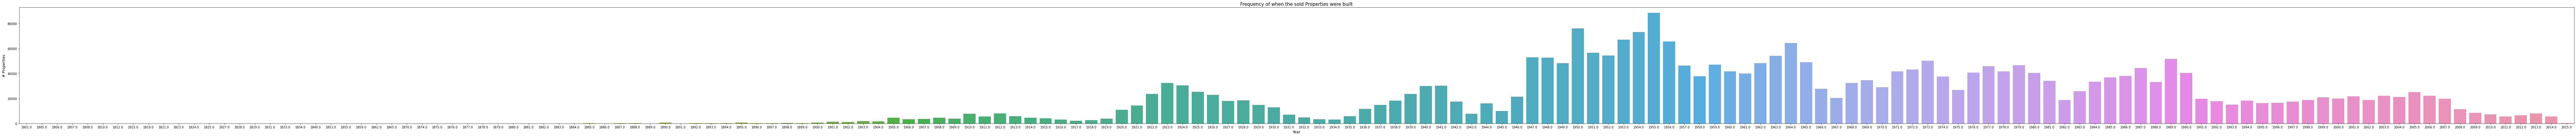

In [ ]:
# Create a barplot with the total number of properties built each year with the values from both datasets put side by side
ax = plt.subplots(figsize = (150,7))
ax = sns.countplot(x="yearbuilt", data=zillow_pdDF)
plt.xlabel('Year', fontsize=12)
plt.ylabel('# Properties', fontsize=12)
plt.title("Frequency of when the sold Properties were built", fontsize=15)

Text(0.5, 1.0, 'Top 10 years in which the Properties sold in 2016 & 2017 were built')

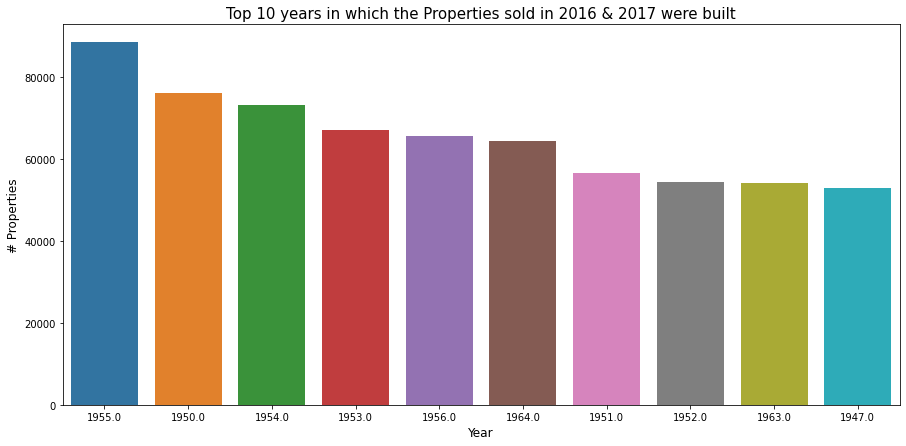

In [ ]:
#Order the barplot by descending total number of properties built
ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x="yearbuilt", data=zillow_pdDF, order=zillow_pdDF.yearbuilt.value_counts().iloc[:10].index)
plt.xlabel('Year', fontsize=12)
plt.ylabel('# Properties', fontsize=12)
plt.title("Top 10 years in which the Properties sold in 2016 & 2017 were built", fontsize=15)

###1.2.2. How Many Bedrooms Do The Properties Have?

Text(0.5, 1.0, 'Frequency of Bedroom Count')

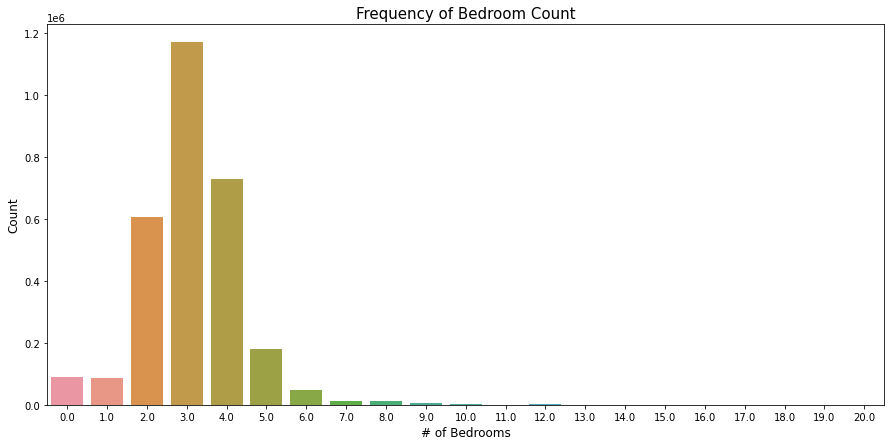

In [ ]:
#Create a barplot to show the distribution of frequency of bathroom count in the properties from both years put side by side
ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x="bedroomcnt", data=zillow_pdDF)
plt.xlabel('# of Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of Bedroom Count", fontsize=15)

###1.2.3. How Many Bathrooms Do The Properties Have?



Text(0.5, 1.0, 'Frequency of Bathroom Count')

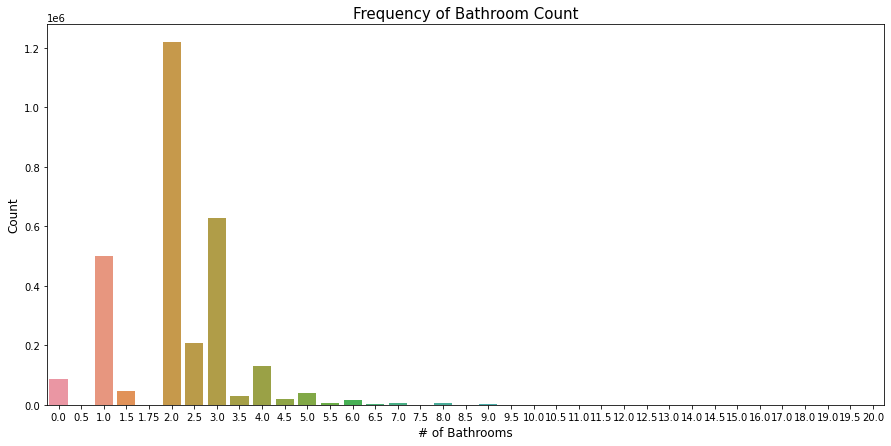

In [ ]:
#Create a barplot to show the distribution of frequency of bathroom count in the properties from both years put side by side
ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x="bathroomcnt", data=zillow_pdDF)
plt.xlabel('# of Bathrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of Bathroom Count", fontsize=15)

#**2. Data Cleaning**

Handling the columns with NULL values - replace with zeroes or drop them based on the meaning od each column in the data dictionary

##**2.1. Remove All Columns With > 80% Missing Values**

In [ ]:
# Store columns with NA Ratio > 80%
na_col_list = over_80_missing_pd.index.tolist()

na_col_list

['storytypeid',
 'basementsqft',
 'yardbuildingsqft26',
 'finishedsquarefeet13',
 'fireplaceflag',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'buildingclasstypeid',
 'decktypeid',
 'finishedsquarefeet6',
 'poolsizesum',
 'pooltypeid2',
 'pooltypeid10',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'hashottuborspa',
 'yardbuildingsqft17',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedfloor1squarefeet',
 'threequarterbathnbr',
 'fireplacecnt',
 'pooltypeid7',
 'poolcnt']

In [ ]:
# Remove columns with more than 80% missing values
zillow_df_drop_na_over80 = zillow_df.drop(*na_col_list)

print("Column Count Before: " + str(len(zillow_df.columns)))
print("Column Count After: " + str(len(zillow_df_drop_na_over80.columns)))

Column Count Before: 58
Column Count After: 34


##**2.2. Checking For Multicollinearity Using Correlation Matrix And Remove Columns With High Correlation**

In [ ]:
# Create empty list to store all the columns we plan to drop
cols_to_drop = []

###2.2.1. Check Correlation of Tax Related Variables

In [ ]:
# Create a df with only columns with only the Room related variables 
tax_variables_df = zillow_df_drop_na_over80.select('structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount','assessmentyear')
tax_variables_pd = tax_variables_df.toPandas()

In [ ]:
# Get the absolute correlations of the variables
tax_corr_matrix= tax_variables_pd.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(tax_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
tax_corr_matrix[mask] = np.nan
(tax_corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear
structuretaxvaluedollarcnt,nan,nan,nan,nan,nan
taxvaluedollarcnt,0.85,nan,nan,nan,nan
landtaxvaluedollarcnt,0.48,0.87,nan,nan,nan
taxamount,0.81,0.95,0.82,nan,nan
assessmentyear,0.00,0.01,0.01,0.02,nan


All 3 other tax related variables are strongly correlated to our target variable as expected, so we should remove 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'. We also should remove 'assessmentyear' as it has almost no correlation to 'taxvaluedollarcnt' or the other.

In [ ]:
# Add column names to the list of columns to drop
cols_to_drop.extend(['structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'assessmentyear'])
cols_to_drop

['structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear']

###2.2.2. Check Correlation of Room Type Related Variables

In [ ]:
# Create a df with only columns with only the Room related variables 
room_variables_df = zillow_df_drop_na_over80.select('bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'unitcnt','taxvaluedollarcnt')
room_variables_pd = room_variables_df.toPandas()

In [ ]:
# Get the absolute correlations of the variables
room_corr_matrix= room_variables_pd.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(room_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
room_corr_matrix[mask] = np.nan
(room_corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,bathroomcnt,bedroomcnt,calculatedbathnbr,fullbathcnt,roomcnt,unitcnt,taxvaluedollarcnt
bathroomcnt,nan,nan,nan,nan,nan,nan,nan
bedroomcnt,0.69,nan,nan,nan,nan,nan,nan
calculatedbathnbr,1.00,0.63,nan,nan,nan,nan,nan
fullbathcnt,0.99,0.63,0.99,nan,nan,nan,nan
roomcnt,0.05,0.15,0.02,0.03,nan,nan,nan
unitcnt,0.04,0.06,0.25,0.25,0.01,nan,nan
taxvaluedollarcnt,0.33,0.15,0.46,0.45,0.00,0.17,nan


"calculatedbathnbr", "bathroomcnt", "fullbathcnt" are highly correlated with eachother, with "calculatedbathnbr" and "bathroomcnt" being perfectly correlated. 

In [ ]:
# Check the number of rows with missing values in each column
room_variables_pd.isna().sum()

bathroomcnt              25
bedroomcnt               13
calculatedbathnbr     86559
fullbathcnt           86559
roomcnt                  38
unitcnt              965362
taxvaluedollarcnt         0
dtype: int64

Since "bathroomcnt" has the least number of missing values, we will keep that column and remove "calculatedbathnbr" and "fullbathcnt" to prevent multicolinearity

In [ ]:
# Add column names to the list of columns to drop
cols_to_drop.extend(['calculatedbathnbr', 'fullbathcnt'])
cols_to_drop

['structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear',
 'calculatedbathnbr',
 'fullbathcnt']

###2.2.3. Check Correlation of Finished Living Area Related Variables




In [ ]:
zillow_df_drop_na_over80.show()

+--------+---------------------+-----------+----------+---------------------+-----------------+----------------------------+--------------------+----+-----------+------------+---------------+---------------------+--------+----------+-----------------+-------------------------+---------------------+------------------+----------------------+------------+--------------+--------------------+-----------+-------+-------+---------+---------------+--------------------------+-----------------+--------------+---------------------+---------+-------------------+
|parcelid|airconditioningtypeid|bathroomcnt|bedroomcnt|buildingqualitytypeid|calculatedbathnbr|calculatedfinishedsquarefeet|finishedsquarefeet12|fips|fullbathcnt|garagecarcnt|garagetotalsqft|heatingorsystemtypeid|latitude| longitude|lotsizesquarefeet|propertycountylandusecode|propertylandusetypeid|propertyzoningdesc|rawcensustractandblock|regionidcity|regionidcounty|regionidneighborhood|regionidzip|roomcnt|unitcnt|yearbuilt|numberofstories

In [ ]:
# Create a df with only columns with only the Living Area related variables 
living_area_variables_df = zillow_df_drop_na_over80.select('calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'garagetotalsqft', 'garagecarcnt', 'lotsizesquarefeet','taxvaluedollarcnt')
living_area_variables_pd = living_area_variables_df.toPandas()

In [ ]:
# Get the absolute correlations of the variables
living_area_corr_matrix= living_area_variables_pd.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(living_area_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
living_area_corr_matrix[mask] = np.nan
(living_area_corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,calculatedfinishedsquarefeet,finishedsquarefeet12,garagetotalsqft,garagecarcnt,lotsizesquarefeet,taxvaluedollarcnt
calculatedfinishedsquarefeet,nan,nan,nan,nan,nan,nan
finishedsquarefeet12,1.00,nan,nan,nan,nan,nan
garagetotalsqft,0.55,0.60,nan,nan,nan,nan
garagecarcnt,0.44,0.53,0.66,nan,nan,nan
lotsizesquarefeet,0.00,0.00,0.01,0.01,nan,nan
taxvaluedollarcnt,0.54,0.60,0.32,0.32,0.00,nan


"finishedsquarefeet12" and "calculatedfinishedsquarefeet" are perfectly correlated, and since "finishedsquarefeet12" has more missing values compared to "calculatedfinishedsquarefeet", we should remove that column and keep the other. We also should remove "garagecarcnt" since it is highly correlated to "garagetotalsqft"

In [ ]:
# Check the number of rows with missing values in each column
living_area_variables_pd.isna().sum()

calculatedfinishedsquarefeet      42228
finishedsquarefeet12             258377
garagetotalsqft                 2059420
garagecarcnt                    2059420
lotsizesquarefeet                234077
taxvaluedollarcnt                     0
dtype: int64

In [ ]:
# Add column names to the list of columns to drop
cols_to_drop.extend(['finishedsquarefeet12','garagecarcnt'])
cols_to_drop

['structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear',
 'calculatedbathnbr',
 'fullbathcnt',
 'finishedsquarefeet12',
 'garagecarcnt']

###2.2.4. Check Correlation of Region Variables

In [ ]:
# Create a df with only columns with only the finished living area related variables 
region_variables_df = zillow_df_drop_na_over80.select('regionidzip', 'regionidneighborhood', 'regionidcounty','regionidcity','propertylandusetypeid','taxvaluedollarcnt')
region_variables_pd = region_variables_df.toPandas()

In [ ]:
# Get the absolute correlations of the variables
region_corr_matrix= region_variables_pd.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(region_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
region_corr_matrix[mask] = np.nan
(region_corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,regionidzip,regionidneighborhood,regionidcounty,regionidcity,propertylandusetypeid,taxvaluedollarcnt
regionidzip,nan,nan,nan,nan,nan,nan
regionidneighborhood,0.10,nan,nan,nan,nan,nan
regionidcounty,0.07,0.18,nan,nan,nan,nan
regionidcity,0.01,0.30,0.06,nan,nan,nan
propertylandusetypeid,0.01,0.02,0.07,0.01,nan,nan
taxvaluedollarcnt,0.01,0.01,0.03,0.02,0.07,nan


Since they have low correlation to our dependent variable, "taxvaluedollarcnt", so we can assume they will not be important in our model.

In [ ]:
# Add column names to the list of columns to drop
cols_to_drop.extend(['propertyzoningdesc', 'regionidzip','regionidcity','regionidneighborhood', 'regionidcounty'])
cols_to_drop

['structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear',
 'calculatedbathnbr',
 'fullbathcnt',
 'finishedsquarefeet12',
 'garagecarcnt',
 'propertyzoningdesc',
 'regionidzip',
 'regionidcity',
 'regionidneighborhood',
 'regionidcounty']

###2.2.5.  Check Correlation of Census Related Cariables

In [ ]:
# Create a df with only columns with only the census related variables 
census_df = zillow_df_drop_na_over80.select('rawcensustractandblock', 'censustractandblock', 'fips')
census_pd = census_df.toPandas()

In [ ]:
# Get the absolute correlations of the variables
census_matrix= census_pd.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(census_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
census_matrix[mask] = np.nan
(census_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,rawcensustractandblock,censustractandblock,fips
rawcensustractandblock,nan,nan,nan
censustractandblock,0.62,nan,nan
fips,1.00,0.62,nan


In [ ]:
# Select "rawcensustractandblock" and "fips" columns
zillow_df_drop_na_over80.withColumn('rawcensustractandblock', zillow_df_drop_na_over80.rawcensustractandblock.cast(DecimalType(11, 3))).select('rawcensustractandblock','censustractandblock','fips').show()

+----------------------+-------------------+----+
|rawcensustractandblock|censustractandblock|fips|
+----------------------+-------------------+----+
|          60378002.041|               null|6037|
|          60378001.011|               null|6037|
|          60377030.012|               null|6037|
|          60371412.023|               null|6037|
|          60371232.052|               null|6037|
|          60371252.001|               null|6037|
|          60371437.001|               null|6037|
|          60373108.003|               null|6037|
|          60373101.003|               null|6037|
|          60373202.023|               null|6037|
|          60371112.022|               null|6037|
|          60379201.081|               null|6037|
|          60379201.071|               null|6037|
|          60379203.142|               null|6037|
|          60379104.011|               null|6037|
|          60379107.051|               null|6037|
|          60379107.091|               null|6037|


In [ ]:
from pyspark.sql.functions import *

# Calcuate missing values % 
zillow_df_drop_na_over80.select([(count(when(isnull(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in ['rawcensustractandblock', 'censustractandblock', 'fips']]).show()

+----------------------+--------------------+----+
|rawcensustractandblock| censustractandblock|fips|
+----------------------+--------------------+----+
|                   0.0|0.012592998120412537| 0.0|
+----------------------+--------------------+----+



censustractandblock (e.g. 60378002.041) is comprised of FIPS Code (6037) - Tract Number (8002.04) - And block Number (4), so we can remove the "censustractandblock" and "fips" columns

In [ ]:
# Add column names to the list of columns to drop
cols_to_drop.extend(['censustractandblock','fips'])
cols_to_drop

['structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear',
 'calculatedbathnbr',
 'fullbathcnt',
 'finishedsquarefeet12',
 'garagecarcnt',
 'propertyzoningdesc',
 'regionidzip',
 'regionidcity',
 'regionidneighborhood',
 'regionidcounty',
 'censustractandblock',
 'fips']

###2.2.6.  Final Correlation Check



In [ ]:
# Remove columns that we have found to have high correlation
zillow_df_drop_cols = zillow_df_drop_na_over80

for col in cols_to_drop:
  zillow_df_drop_cols = zillow_df_drop_cols.drop(col)

# Create a df with only columns with "int" and "double" variables 
corr_df = (zillow_df_drop_cols.select("*").toPandas()).select_dtypes(exclude=['object'])

# Remove ID variables as they are vategorical variables
corr_df = corr_df.drop(columns=['parcelid','airconditioningtypeid','buildingqualitytypeid','heatingorsystemtypeid','propertylandusetypeid'])

# Get the absolute correlations of the variables
corr_matrix= corr_df.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,garagetotalsqft,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,numberofstories,taxvaluedollarcnt
bathroomcnt,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedroomcnt,0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
calculatedfinishedsquarefeet,0.35,0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
garagetotalsqft,0.44,0.56,0.55,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.03,0.05,0.00,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,0.02,0.00,0.01,0.02,0.58,nan,nan,nan,nan,nan,nan,nan,nan
lotsizesquarefeet,0.01,0.02,0.00,0.01,0.03,0.02,nan,nan,nan,nan,nan,nan,nan
rawcensustractandblock,0.01,0.01,0.02,0.03,0.04,0.35,0.02,nan,nan,nan,nan,nan,nan
roomcnt,0.05,0.15,0.03,0.38,0.23,0.02,0.02,0.70,nan,nan,nan,nan,nan
unitcnt,0.04,0.06,0.39,0.02,0.04,0.01,0.01,0.07,0.01,nan,nan,nan,nan


Since there are no variables left that have a correlation coefficient higher than 0.8, we should not have issues with multicollinearity 

In [ ]:
print("Column Count Before: " + str(len(zillow_df_drop_na_over80.columns)))
print("Column Count After: " + str(len(zillow_df_drop_cols.columns)))

Column Count Before: 34
Column Count After: 19


##**2.3. Remove Rows With Missing Values**


In [ ]:
from pyspark.sql.functions import *

# Calcuate missing values % for each column after removing columns with over 80% missing values and columns that may lead to data leakage
perc_missing_cleaned_df = zillow_df_drop_cols.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in zillow_df_drop_cols.columns])

# Convert to pandas DF and sort by descending missing_perc values
perc_missing_cleaned_pd = perc_missing_cleaned_df.select("*").toPandas().transpose().rename(columns={0: "missing_perc"}).sort_values(by='missing_perc', ascending=False)

perc_missing_cleaned_pd

,missing_perc
numberofstories,0.768225
airconditioningtypeid,0.724230
garagetotalsqft,0.699848
heatingorsystemtypeid,0.386181
buildingqualitytypeid,0.341310
unitcnt,0.328057
lotsizesquarefeet,0.079546
yearbuilt,0.016047
calculatedfinishedsquarefeet,0.014350
propertycountylandusecode,0.000266


Since there is only a small number of records with null values in certain columns ("bathroomcnt", "bedroomcnt","propertycountylandusecode", and "roomcnt") we can just remove those records in columns with a small number of missing columns instead of replacing the null values with something else since it would be difficult to replace the values, and since it is a small number of records it's quicker to just drop those records. 

In [ ]:
# Keep only the columns with missing value percentages between 0 and 0.1 and sort by descending order
under_10perc_missing_pd = perc_missing_cleaned_pd.loc[(perc_missing_cleaned_pd["missing_perc"] < 0.1) & (perc_missing_cleaned_pd["missing_perc"] > 0)].sort_values(by='missing_perc', ascending=False)

# Store the columns with missing value percentages between 0 and 0.1
column_list = under_10perc_missing_pd.index.to_list()

# Create a copy of the zillow_df_drop_cols Dataframe
zillow_df_drop_cols2 = zillow_df_drop_cols

# Iterate through each column in the list and filter out the rows that contain null values for that column
for c in column_list:
  zillow_df_drop_cols2 = zillow_df_drop_cols2.filter(col(c).isNotNull())

print("Record Count Before: " + str(zillow_df_drop_cols.count()))
print("Record Count After: " + str(zillow_df_drop_cols2.count()))

Record Count Before: 2942667
Record Count After: 2690809


In [ ]:
print(len(zillow_df_drop_cols2.columns))

19


##**2.4. Replacing Missing Values**

###2.4.1. Categorical Variables

In [ ]:
zillow_df_drop_cols2.groupBy('airconditioningtypeid').count().show()

+---------------------+-------+
|airconditioningtypeid|  count|
+---------------------+-------+
|                   12|     47|
|                 null|1918727|
|                    1| 704442|
|                   13|  58305|
|                    3|      5|
|                    5|   8394|
|                    9|     19|
|                   11|    870|
+---------------------+-------+



Since airconditioningtypeid = 5, which represents no airconditioning unit present on the property, already exists, we can use replace the null values with 0 still since that ID does not already represent a category in that column

In [ ]:
zillow_df_drop_cols2.groupBy('buildingqualitytypeid').count().show()

+---------------------+-------+
|buildingqualitytypeid|  count|
+---------------------+-------+
|                   12|   3572|
|                 null| 787396|
|                    1|  64871|
|                    6|     78|
|                    3|      6|
|                    5|     20|
|                    9|     25|
|                    4| 671924|
|                    8|     49|
|                    7|1125247|
|                   10|  37600|
|                   11|     19|
|                    2|      2|
+---------------------+-------+



In [ ]:
zillow_df_drop_cols2.groupBy('heatingorsystemtypeid').count().show()       

+---------------------+-------+
|heatingorsystemtypeid|  count|
+---------------------+-------+
|                 null| 946793|
|                    1|    148|
|                   13|    550|
|                    6|  20915|
|                   20|   2250|
|                    7| 592379|
|                   10|     18|
|                   24|     29|
|                   11|      5|
|                   14|     41|
|                    2|1127592|
|                   18|     89|
+---------------------+-------+



Again, since heatingorsystemtypeid = 13 represents No heating system present on the property, we can still use 0 to replace the null values since that ID does not already represent a category in that column

###2.4.2. Discrete & Continuous Variables

In [ ]:
zillow_df_drop_cols2.groupBy('unitcnt').count().orderBy(['unitcnt'], ascending=[1]).show()

+-------+-------+
|unitcnt|  count|
+-------+-------+
|   null| 751414|
|      1|1746577|
|      2| 113241|
|      3|  38795|
|      4|  38855|
|      5|    560|
|      6|    345|
|      7|    160|
|      8|    170|
|      9|     85|
|     10|     94|
|     11|     44|
|     12|     47|
|     13|     33|
|     14|     30|
|     15|     15|
|     16|     30|
|     17|     11|
|     18|     16|
|     19|      9|
+-------+-------+
only showing top 20 rows



According to the data dictionary, unitcnt is the "Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)". We can assume that if the value is null that means it is built into a structure that does not have any sort of unit system, so for now we can replace it with 0 as well.

We can assume that if the value is null that means there is no garage on the property, hence we can also change any null values to 0 as no garage means the size is 0 by default.

In [ ]:
zillow_df_drop_cols2.groupBy('numberofstories').count().orderBy(["count"], ascending=[0]).show()

+---------------+-------+
|numberofstories|  count|
+---------------+-------+
|           null|2059915|
|              1| 396854|
|              2| 219443|
|              3|  14524|
|              4|     54|
|              5|      9|
|              6|      4|
|              7|      2|
|             41|      1|
|             17|      1|
|             14|      1|
|              8|      1|
+---------------+-------+



numberofstories, according to the data dictionary, is the "Number of stories or levels the home has". So we can assume that if the value is null, that means that the property does not have any stories, so we can set the null values to 0. Since there are a bunch of outliers, we can group all values > 3 together 

In [ ]:
# Replace missing values in selected colmns with 0
zillow_no_missing_val_df = zillow_df_drop_cols2.na.fill(value=0,subset=["airconditioningtypeid", "buildingqualitytypeid", "heatingorsystemtypeid", "unitcnt", "garagetotalsqft", "numberofstories"])

zillow_no_missing_val_df.show()

+--------+---------------------+-----------+----------+---------------------+----------------------------+---------------+---------------------+--------+----------+-----------------+-------------------------+---------------------+----------------------+-------+-------+---------+---------------+-----------------+
|parcelid|airconditioningtypeid|bathroomcnt|bedroomcnt|buildingqualitytypeid|calculatedfinishedsquarefeet|garagetotalsqft|heatingorsystemtypeid|latitude| longitude|lotsizesquarefeet|propertycountylandusecode|propertylandusetypeid|rawcensustractandblock|roomcnt|unitcnt|yearbuilt|numberofstories|taxvaluedollarcnt|
+--------+---------------------+-----------+----------+---------------------+----------------------------+---------------+---------------------+--------+----------+-----------------+-------------------------+---------------------+----------------------+-------+-------+---------+---------------+-----------------+
|10859147|                    0|        0.0|       0.0|   

In [ ]:
# Check to make sure there are no missing values
zillow_no_missing_val_df.select("*").toPandas().isna().sum()

parcelid                        0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
numberofstories                 0
taxvaluedollarcnt               0
dtype: int64

##**2.5. Convert Column Datatypes**




In [ ]:
# Check the datatypes for each column
print('Columns overview')
pd.DataFrame(zillow_no_missing_val_df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,parcelid,int
1,airconditioningtypeid,int
2,bathroomcnt,double
3,bedroomcnt,double
4,buildingqualitytypeid,int
5,calculatedfinishedsquarefeet,double
6,garagetotalsqft,int
7,heatingorsystemtypeid,int
8,latitude,int
9,longitude,int


In [ ]:
# Convert the categorical variables from int to string
# zillow_no_missing_vals2 = zillow_no_missing_val_df.withColumn("parcelid",zillow_no_missing_val_df["parcelid"].cast(StringType()))
# zillow_no_missing_vals3 = zillow_no_missing_vals2.withColumn("airconditioningtypeid",zillow_no_missing_vals2["airconditioningtypeid"].cast(StringType()))
# zillow_no_missing_vals4 = zillow_no_missing_vals3.withColumn("buildingqualitytypeid",zillow_no_missing_vals3["buildingqualitytypeid"].cast(StringType()))
# zillow_no_missing_vals5 = zillow_no_missing_vals4.withColumn("heatingorsystemtypeid",zillow_no_missing_vals4["heatingorsystemtypeid"].cast(StringType()))
# zillow_no_missing_vals6 = zillow_no_missing_vals5.withColumn("propertylandusetypeid",zillow_no_missing_vals5["propertylandusetypeid"].cast(StringType()))

# Convert count and year variable from double to int
zillow_no_missing_vals7 = zillow_no_missing_val_df.withColumn("bathroomcnt",zillow_no_missing_val_df["bathroomcnt"].cast(IntegerType()))
zillow_no_missing_vals8 = zillow_no_missing_vals7.withColumn("bedroomcnt",zillow_no_missing_vals7["bedroomcnt"].cast(IntegerType()))
zillow_no_missing_vals9 = zillow_no_missing_vals8.withColumn("yearbuilt",zillow_no_missing_vals8["yearbuilt"].cast(IntegerType()))

# Convert the categorical variables from string to int
zillow_no_missing_vals10 = zillow_no_missing_vals9.withColumn("propertylandusetypeid",zillow_no_missing_vals9["propertylandusetypeid"].cast(IntegerType()))

# Convert from int to double
zillow_final_df = zillow_no_missing_vals10.withColumn("garagetotalsqft",zillow_no_missing_vals10["garagetotalsqft"].cast(DoubleType()))



In [ ]:
# Check the datatypes for each column again
print('Columns overview')
pd.DataFrame(zillow_final_df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,parcelid,int
1,airconditioningtypeid,int
2,bathroomcnt,int
3,bedroomcnt,int
4,buildingqualitytypeid,int
5,calculatedfinishedsquarefeet,double
6,garagetotalsqft,double
7,heatingorsystemtypeid,int
8,latitude,int
9,longitude,int


##**2.6. Use Correlation Matrix To Check Final Data**

In [ ]:
# Create a df with only columns with "int" and "double" variables 
corr_df = (zillow_final_df.select("*").toPandas()).select_dtypes(exclude=['object'])

# Get the absolute correlations of the variables
corr_matrix= corr_df.corr().abs()

# Plot Correlation matrix graph and hide diagonal and upper half values
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,roomcnt,unitcnt,yearbuilt,numberofstories,taxvaluedollarcnt
parcelid,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
airconditioningtypeid,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathroomcnt,0.04,0.07,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedroomcnt,0.05,0.03,0.65,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
buildingqualitytypeid,0.47,0.18,0.10,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
calculatedfinishedsquarefeet,0.02,0.08,0.40,0.29,0.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
garagetotalsqft,0.48,0.18,0.10,0.18,0.74,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
heatingorsystemtypeid,0.28,0.14,0.30,0.24,0.59,0.19,0.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.19,0.07,0.04,0.01,0.31,0.02,0.39,0.13,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
longitude,0.05,0.16,0.02,0.04,0.09,0.00,0.17,0.03,0.54,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
# Check for strong correlation among the variables - print any column pairs with a correlation value of >0.8 
for row in corr_matrix.index:
  for col in corr_matrix.columns:
    if corr_matrix.loc[row,col] >= 0.8 and corr_matrix.loc[row,col] <1:
      print(row, col, corr_matrix.loc[row,col])

numberofstories roomcnt 0.8938456270330825


We check if there is perfect or strong correlation between any of the variables. If the absolute correlation coefficient is >= 0.80, we should remove one of the variables to avoid multicollinearity in the data-set. 

We use a Correlation Coefficient of 0.8 as it represents a fairly strong relationship. There is only one pair of variables that have high correlation, "numberofstories" and "roomcnt". But since they are not highly correlated to the dependent variable, "taxvaluedollarcnt", it should not cause any issues and may just be a coincidence.

In [ ]:
print(len(zillow_final_df.columns))

19


##2.7. Export The Final Cleaned Dataframe to a csv

In [ ]:
# Convert the Spark DataFrame to a Pandas DataFrame using Arrow
#zillow_final_pd = zillow_final_df.select("*").toPandas()

# Save to csv file
#zillow_final_pd.to_csv('zillow_cleaned_data.csv', index=False)

#**3. Preparing The Data For Modelling**

We saved the final dataframe, post data cleaning, as a csv - this helped us in re-running the code in shorter time. Java server errors occured numerous times while running the models. 

In [ ]:
data=spark.read.csv('/content/drive/MyDrive/IDS561_Project/zillow_cleaned_data.csv',header=True)
data.show(5)

+--------+---------------------+-----------+----------+---------------------+----------------------------+---------------+---------------------+--------+----------+-----------------+-------------------------+---------------------+----------------------+-------+-------+---------+---------------+-----------------+
|parcelid|airconditioningtypeid|bathroomcnt|bedroomcnt|buildingqualitytypeid|calculatedfinishedsquarefeet|garagetotalsqft|heatingorsystemtypeid|latitude| longitude|lotsizesquarefeet|propertycountylandusecode|propertylandusetypeid|rawcensustractandblock|roomcnt|unitcnt|yearbuilt|numberofstories|taxvaluedollarcnt|
+--------+---------------------+-----------+----------+---------------------+----------------------------+---------------+---------------------+--------+----------+-----------------+-------------------------+---------------------+----------------------+-------+-------+---------+---------------+-----------------+
|10859147|                    0|          0|         0|   

## 3.1 Cast the columns into int/double - Spark ML library only works with numeric data.

In [ ]:
#original datatypes
# print(zillow_df.dtypes)

One of the things we noticed from the data exploration from above was that all the columns were of String type. But that doesn’t seem right. Some of them should be numeric. So we are going to cast them. 

In [ ]:
from pyspark.sql.functions import col
dataset = data.select(col('taxvaluedollarcnt').cast('float'),
                         col('parcelid').cast('int'),
                         col('airconditioningtypeid').cast('int'),
                         col('buildingqualitytypeid').cast('int'),
                         col('calculatedfinishedsquarefeet').cast('double'),
                         col('garagetotalsqft').cast('double'),
                         col('heatingorsystemtypeid').cast('int'),
                         col('longitude').cast('int'),
                         col('lotsizesquarefeet').cast('double'),
                         col('propertylandusetypeid').cast('int'),
                         col('rawcensustractandblock').cast('double'),
                         col('roomcnt').cast('int'),
                         col('unitcnt').cast('int'),
                         col('yearbuilt').cast('int'),
                         col('numberofstories').cast('int'),
                         col('bathroomcnt').cast('int'),
                         col('bedroomcnt').cast('int'),
                         col('latitude').cast('int'),
                        )
dataset.show()

+-----------------+--------+---------------------+---------------------+----------------------------+---------------+---------------------+----------+-----------------+---------------------+----------------------+-------+-------+---------+---------------+-----------+----------+--------+
|taxvaluedollarcnt|parcelid|airconditioningtypeid|buildingqualitytypeid|calculatedfinishedsquarefeet|garagetotalsqft|heatingorsystemtypeid| longitude|lotsizesquarefeet|propertylandusetypeid|rawcensustractandblock|roomcnt|unitcnt|yearbuilt|numberofstories|bathroomcnt|bedroomcnt|latitude|
+-----------------+--------+---------------------+---------------------+----------------------------+---------------+---------------------+----------+-----------------+---------------------+----------------------+-------+-------+---------+---------------+-----------+----------+--------+
|        1156834.0|10859147|                    0|                    7|                      5068.0|            0.0|                   

In [ ]:
print(len(dataset.columns))

18


We now want to predict “tax dollar amount” and need to combine the information of all the columns into one column. To do that in Spark we use the VectorAssembler.

## 3.2 Get the dense vector of features and label

In [ ]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

def transData(data):
  return data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]]).toDF(['features','label'])

transformed= transData(dataset)
transformed.show(5)

+--------------------+--------+
|            features|   label|
+--------------------+--------+
|[1156834.0,1.0859...|34148863|
|[433491.0,1.08799...|34194168|
|[283315.0,1.08983...|34171873|
|[688486.0,1.09407...|34171345|
|[261201.0,1.09763...|34289776|
+--------------------+--------+
only showing top 5 rows



## 3.3 Deal with categorical variables

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 15 distinct values are treated as continuous.

featureIndexer = VectorIndexer(inputCol="features", \
                               outputCol="indexedFeatures",\
                               maxCategories=15).fit(transformed)

data = featureIndexer.transform(transformed)

In [ ]:
data.show(5,True)

+--------------------+--------+--------------------+
|            features|   label|     indexedFeatures|
+--------------------+--------+--------------------+
|[1156834.0,1.0859...|34148863|[1156834.0,1.0859...|
|[433491.0,1.08799...|34194168|[433491.0,1.08799...|
|[283315.0,1.08983...|34171873|[283315.0,1.08983...|
|[688486.0,1.09407...|34171345|[688486.0,1.09407...|
|[261201.0,1.09763...|34289776|[261201.0,1.09763...|
+--------------------+--------+--------------------+
only showing top 5 rows



## 3.4 Normalize the features

In [ ]:
from pyspark.ml.feature import Normalizer

normalizer = Normalizer(inputCol="indexedFeatures", outputCol="features_norm", p=1.0)
# vhouse_norm_df = normalizer.transform(vhouse_df)
vhouse_norm_df = normalizer.transform(data)
vhouse_norm_df.show()

+--------------------+--------+--------------------+--------------------+
|            features|   label|     indexedFeatures|       features_norm|
+--------------------+--------+--------------------+--------------------+
|[1156834.0,1.0859...|34148863|[1156834.0,1.0859...|[0.00606182761854...|
|[433491.0,1.08799...|34194168|[433491.0,1.08799...|[0.00228053867979...|
|[283315.0,1.08983...|34171873|[283315.0,1.08983...|[0.00149159734198...|
|[688486.0,1.09407...|34171345|[688486.0,1.09407...|[0.00361736330175...|
|[261201.0,1.09763...|34289776|[261201.0,1.09763...|[0.00137433653838...|
|[430208.0,1.10739...|34265214|[430208.0,1.10739...|[0.00225945619824...|
|[62424.0,1.128734...|34690736|[62424.0,1.128734...|[3.28759199980160...|
|[102385.0,1.12885...|34733960|[102385.0,1.12885...|[5.38976990872656...|
|[291973.0,1.13245...|34560018|[291973.0,1.13245...|[0.00153523819417...|
|[503752.0,1.13913...|33986910|[503752.0,1.13913...|[0.00264282660981...|
|[231720.0,1.14043...|33959896|[231720

## 3.5.  Split The Data Into Train And Test Data

In [ ]:
#trainvalidationsplit Randomly splits the input dataset into train and validation sets, and uses evaluation metric on the validation set to select the best model. 
splits = vhouse_norm_df.randomSplit([0.7, 0.3], seed = 603 )
train_df = splits[0]
test_df = splits[1]

In [ ]:
print("Training Dataset Columns: " + str(len(train_df.columns)))
print("Test Dataset Columns: " + str(len(test_df.columns)))
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Columns: 4
Test Dataset Columns: 4
Training Dataset Count: 1882905
Test Dataset Count: 807904


In [ ]:
train_df.show(5)

+--------------------+--------+--------------------+--------------------+
|            features|   label|     indexedFeatures|       features_norm|
+--------------------+--------+--------------------+--------------------+
|[9.0,1.0746669E7,...|34131730|[9.0,1.0746669E7,...|[4.73704586652297...|
|[9.0,1.075564E7,0...|34136351|[9.0,1.075564E7,0...|[4.74085176742744...|
|[9.0,1.1173044E7,...|34402069|[9.0,1.1173044E7,...|[4.72360568421657...|
|[9.0,1.1686616E7,...|34021619|[9.0,1.1686616E7,...|[4.71445343677443...|
|[9.0,1.2053982E7,...|34172100|[9.0,1.2053982E7,...|[4.71868099458880...|
+--------------------+--------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
test_df.show(5)

+--------------------+--------+--------------------+--------------------+
|            features|   label|     indexedFeatures|       features_norm|
+--------------------+--------+--------------------+--------------------+
|[9.0,1.2405579E7,...|33882242|[9.0,1.2405579E7,...|[4.71354140470618...|
|[9.0,1.2734362E7,...|33906463|[9.0,1.2734362E7,...|[4.70264852822792...|
|[9.0,1.2734665E7,...|33908442|[9.0,1.2734665E7,...|[4.70908844727949...|
|[9.0,1.2734666E7,...|33908722|[9.0,1.2734666E7,...|[4.70873824804007...|
|[9.0,1.281785E7,0...|33995626|[9.0,1.281785E7,0...|[4.70622973933364...|
+--------------------+--------+--------------------+--------------------+
only showing top 5 rows



# **4. Prediction Models**

## 4.1 Decision Tree

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

# Train the DecisionTree model
dt = DecisionTreeRegressor(featuresCol = 'features_norm', labelCol = 'label')

# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, dt])

model = pipeline.fit(train_df)

In [ ]:
# Make predictions.
predictions = model.transform(test_df)

### 4.1.1 Evaluate the RMSE and R2

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(labelCol="label",
                                predictionCol="prediction",
                                metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 82697.4


In [ ]:
y_true = predictions.select("label").toPandas()
y_pred = predictions.select("prediction").toPandas()

import sklearn.metrics
r2_score = sklearn.metrics.r2_score(y_true, y_pred)
print('r2_score: {0}'.format(r2_score))

r2_score: 0.8773315447915208


### 4.1.2 **Evaluation dataframe for comparing Model Performances**




In [ ]:
perf_params = [r2_score, rmse]
model_perf = pd.DataFrame( columns = ['name', 'rsquared', 'rmse'] )

model_perf = model_perf.append( pd.Series( ["Decision Tree"] + perf_params ,
                 index = model_perf.columns ),
                 ignore_index = True )
model_perf

,name,rsquared,rmse
0,Decision Tree,0.877332,82697.399932


## 4.2 Random Forest

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

# Train the RandomForest model
rf = RandomForestRegressor(labelCol="label", featuresCol="features_norm",numTrees=9, maxDepth=6, seed = 42 ) 

In [ ]:
# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, rf])
rf_model = pipeline.fit(train_df)

In [ ]:
predictions_rf = rf_model.transform(test_df)

### 4.2.1 Evaluate the RMSE and R2

In [ ]:
evaluator = RegressionEvaluator(labelCol="label",
                                predictionCol="prediction",
                                metricName="rmse")

rmse_rf = evaluator.evaluate(predictions_rf)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_rf)

Root Mean Squared Error (RMSE) on test data = 80512.7


In [ ]:
evaluator = RegressionEvaluator(labelCol="label",
                                predictionCol="prediction",
                                metricName="r2")

r2_rf = evaluator.evaluate(predictions_rf)

print("r2 on test data for Random Forest = %g" %r2_rf)

r2 on test data for Random Forest = 0.883727


### 4.2.2 Evaluation of Dataframe for comparing model performances

In [ ]:
rf_perf = [r2_rf, rmse_rf]


model_perf = model_perf.append( pd.Series( ["Random Forest Tree"] + rf_perf ,
                 index = model_perf.columns ),
                 ignore_index = True )

model_perf

,name,rsquared,rmse
0,Decision Tree,0.877332,82697.399932
1,Random Forest Tree,0.883727,80512.721006


## 4.3 Linear Regression

In [ ]:
# Import LinearRegression class
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lr = LinearRegression(featuresCol = 'features_norm', labelCol='label', maxIter=50, regParam=0.0, elasticNetParam=0.0) 

# Chain indexer and tree in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, lr])

lr_model = pipeline.fit(train_df)

### 4.3.1 Evaluate the RMSE and R2 on test data

In [ ]:
lr_predictions = lr_model.transform(test_df)

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse_lr = evaluator.evaluate(lr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_lr)


lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="label",metricName="r2")
r2_lr = lr_evaluator.evaluate(lr_predictions)
print("R Squared (R2) on val data = %g" % r2_lr)

Root Mean Squared Error (RMSE) on test data = 199822
R Squared (R2) on val data = 0.283798


### 4.3.2 Evaluation of DF for model performances

In [ ]:
perf_params_lr = [r2_lr,rmse_lr]

model_perf = model_perf.append( pd.Series( ["Linear Regression"] + perf_params_lr ,
                 index = model_perf.columns ),
                 ignore_index = True )

model_perf

,name,rsquared,rmse
0,Decision Tree,0.877332,82697.399932
1,Random Forest Tree,0.883727,80512.721006
2,Linear Regression,0.283798,199822.008406


## 4.4 Logistic Regression

In [ ]:
# from pyspark.ml.classification import LogisticRegression
# log = LogisticRegression(featuresCol='features_norm',labelCol='label')

# # Chain indexer and tree in a Pipeline
# pipeline_log = Pipeline(stages=[featureIndexer, log])

# log_model = pipeline_log.fit(train_df)

# log_predictions = log_model.transform(test_df)

### 4.4.1 Evaluate the RMSE and R2 on test data

In [ ]:
# evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
# rmse_log = evaluator.evaluate(log_predictions)
# print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_log)


# log_evaluator = RegressionEvaluator(predictionCol="prediction", \
#                  labelCol="label",metricName="r2")
# r2_log = lr_evaluator.evaluate(log_predictions)
# print("R Squared (R2) on val data = %g" % r2_log)

### 4.4.2 Evaluation of DF for model performances

In [ ]:
# perf_params_log = [r2_log,rmse_log]

# model_perf = model_perf.append( pd.Series( ["Logistic Regression"] + perf_params_log ,
#                  index = model_perf.columns ),
#                  ignore_index = True )

# model_perf

## 4.5 Gradient Boosted Tree Regression

In [ ]:
from pyspark.ml.regression import GBTRegressor

# Import LinearRegression class
from pyspark.ml.regression import GBTRegressor

#define algorithm
gbt = GBTRegressor(featuresCol = 'features_norm', labelCol = 'label', maxIter=9, maxDepth=6, seed = 42)

# Chain indexer and tree in a Pipeline
pipeline_gbt = Pipeline(stages=[featureIndexer, gbt])
model_gbt = pipeline_gbt.fit(train_df)

#predictions on test
predictions_gbt = model_gbt.transform(test_df)



### 4.5.1 Evaluate the RMSE and R2

In [ ]:
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse_gbt = evaluator.evaluate(predictions_gbt)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_gbt)


gbt_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="label",metricName="r2")
r2_gbt = gbt_evaluator.evaluate(predictions_gbt)
print("R Squared (R2) on val data = %g" % r2_gbt)

### 4.5.2 Evaluation of DF for model performances

In [ ]:
perf_params_log = [r2_gbt,rmse_gbt]

model_perf = model_perf.append( pd.Series( ["Gradient Boosted Tree Regression"] + perf_params_log ,
                 index = model_perf.columns ),
                 ignore_index = True )

model_perf

## Combined Evaluation Metrics

In [ ]:
# model_perf.plot(x ='name', y='rsquared', kind = 'bar')

In [ ]:
model_perf.plot(x ='name', y='rsquared', kind = 'bar')